<a href="https://colab.research.google.com/github/joaovictordds/Segmentacao_de_clientes/blob/main/modelos_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Escreva vários algoritmos de Agrupamento ou clusterização.
* Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio.
* Desenvolva uma API que retorne um “Score de Cluster” para cada cliente, indicando à qual cluster ele pertence.
* Crie um README sobre como interpretar e usar a sua solução.
* Escreva um Relatório, respondendo às perguntas de negócio.

In [97]:
import pandas as pd
dados = pd.read_csv('dataprep.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(24)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2016-11-29,7.65,17850,United Kingdom,2016,11,29,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2016-11-29,4.25,17850,United Kingdom,2016,11,29,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2016-11-29,1.85,17850,United Kingdom,2016,11,29,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2016-11-29,1.85,17850,United Kingdom,2016,11,29,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2016-11-29,1.69,13047,United Kingdom,2016,11,29,54.08


In [10]:
# Importando bilbiotecas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Modelo I

Separando clientes por volume de vendas

In [5]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('IdCliente').agg({'ValorTotal': ['mean','sum','max']})
clientes = pd.DataFrame(var)
clientes.columns = ['Mean', 'Sum','Max']
clientes.head(6)

,Mean,Sum,Max
IdCliente,,,
12347,23.681319,4310.00,249.6
12348,57.975484,1797.24,240.0
12349,24.076027,1757.55,300.0
12350,19.670588,334.40,40.0
12352,29.482824,2506.04,376.5
12353,22.250000,89.00,39.8


In [123]:
dados[dados['IdCliente'] == 12347]['ValorTotal'].sum()

4310.000000000001

In [122]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('IdCliente').agg({'ValorTotal': ['sum']})
var

,ValorTotal
,sum
IdCliente,
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
12352,2506.04
...,...
18280,180.60
18281,80.82


In [124]:
# Passando os dados dos clientes para o formato de matriz
matriz = var.values
matriz

array([[4310.  ],
       [1797.24],
       [1757.55],
       ...,
       [ 178.05],
       [2094.88],
       [1837.28]])

In [125]:
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(matriz)
matriz

array([[ 0.28259252],
       [-0.01984441],
       [-0.02462151],
       ...,
       [-0.21473085],
       [ 0.01597968],
       [-0.01502517]])

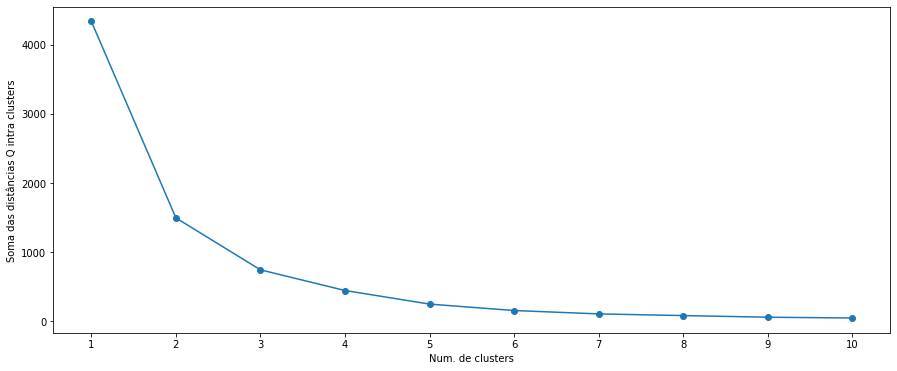

In [126]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(matriz)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [127]:
#Criando um modelo
modelo = KMeans(n_clusters=3)
modelo.fit(matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
# Adicionando os clusters na tabela de clientes
var['Categoria'] = modelo.predict(matriz)
var.head()

,ValorTotal,Categoria
,sum,
IdCliente,,
12347,4310.00,0
12348,1797.24,0
12349,1757.55,0
12350,334.40,0
12352,2506.04,0


In [134]:
# Renomeando os clusters
var['Categoria'] = var['Categoria'].map({0: 'bronze', 2: 'prata', 1: 'ouro'})

In [135]:
# Grafico
var['Categoria'].value_counts()#.plot(kind='barh');

bronze    4308
prata       23
ouro         4
Name: Categoria, dtype: int64

### Modelo II

Separando os clientes de acordo com o volume de venda

In [136]:
import pandas as pd
dados = pd.read_csv('dataprep.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00


In [139]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('IdCliente').agg({'Qtde': ['mean','sum','max']})
clientes = pd.DataFrame(var)
clientes.columns = ['Mean', 'Sum','Max']
clientes.head(6)

,Mean,Sum,Max
IdCliente,,,
12347,13.505495,2458,240
12348,75.516129,2341,144
12349,8.643836,631,36
12350,11.588235,197,24
12352,6.305882,536,16
12353,5.000000,20,8


In [140]:
# Passando os dados dos clientes para o formato de matriz
matriz = clientes.values
matriz

array([[1.35054945e+01, 2.45800000e+03, 2.40000000e+02],
       [7.55161290e+01, 2.34100000e+03, 1.44000000e+02],
       [8.64383562e+00, 6.31000000e+02, 3.60000000e+01],
       ...,
       [8.58333333e+00, 1.03000000e+02, 4.80000000e+01],
       [1.84788360e+00, 1.39700000e+03, 1.30000000e+01],
       [2.26571429e+01, 1.58600000e+03, 6.00000000e+01]])

In [141]:
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(matriz)
matriz

array([[-0.08575126,  0.28041615,  1.01415991],
       [ 0.84145757,  0.25551147,  0.41726368],
       [-0.15844481, -0.10848007, -0.25424457],
       ...,
       [-0.15934947, -0.22087044, -0.17963255],
       [-0.26006072,  0.05457111, -0.39725096],
       [ 0.05108799,  0.09480175, -0.10502052]])

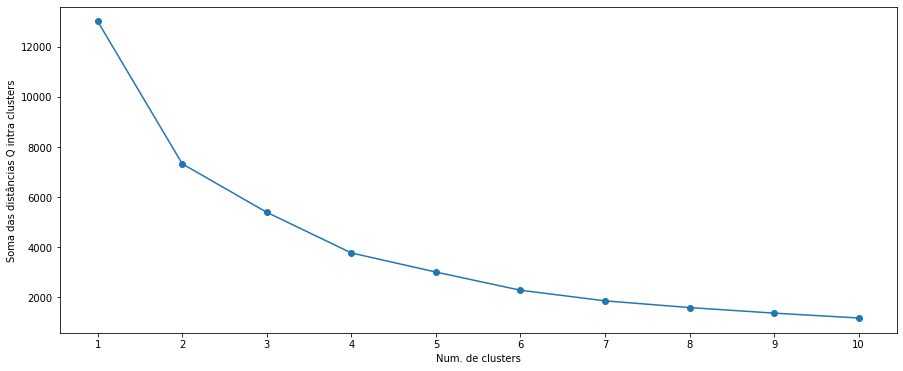

In [142]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(matriz)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [143]:
#Criando um modelo
modelo = KMeans(n_clusters=4)
modelo.fit(matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
# Adicionando os clusters na tabela de clientes
clientes['Categoria'] = modelo.predict(matriz)
clientes.head()

,Mean,Sum,Max,Categoria
IdCliente,,,,
12347,13.505495,2458,240,0
12348,75.516129,2341,144,0
12349,8.643836,631,36,0
12350,11.588235,197,24,0
12352,6.305882,536,16,0


In [157]:
# Renomeando os clusters
clientes['Categoria'] = clientes['Categoria'].map({0: 'bronze', 3: 'prata', 1: 'ouro', 2:'platina'})

In [158]:
# Grafico
clientes['Categoria'].value_counts()#.plot(kind='barh');

bronze     4258
prata        61
ouro         10
platina       6
Name: Categoria, dtype: int64

Os clientes que compram na média um volume elevado de itens são os platinados.

### Modelo x

Separndo clientes de acordo com o tipo de produto

In [25]:
dados['ItemFat']= pd.factorize(dados['Item'])[0]
dados['PaisFat']=pd.factorize(dados['Pais'])[0]

In [26]:
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal,ItemFat,PaisFat
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30,0,0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00,2,0


In [41]:
modelo2 = dados[['IdVenda','Qtde', 'IdCliente','Ano', 'ValorTotal', 'ItemFat', 'PaisFat']]
modelo2

,IdVenda,Qtde,IdCliente,Ano,ValorTotal,ItemFat,PaisFat
0,536365,6,17850,2016,15.30,0,0
1,536365,6,17850,2016,20.34,1,0
2,536365,8,17850,2016,22.00,2,0
3,536365,6,17850,2016,20.34,3,0
4,536365,6,17850,2016,20.34,4,0
...,...,...,...,...,...,...,...
397841,581587,12,12680,2017,10.20,1842,1
397842,581587,6,12680,2017,12.60,411,1
397843,581587,4,12680,2017,16.60,2925,1
397844,581587,4,12680,2017,16.60,2928,1


In [42]:
# Passando os dados dos clientes para o formato de matriz
modelo2m = modelo2.values
modelo2m

array([[5.36365e+05, 6.00000e+00, 1.78500e+04, ..., 1.53000e+01,
        0.00000e+00, 0.00000e+00],
       [5.36365e+05, 6.00000e+00, 1.78500e+04, ..., 2.03400e+01,
        1.00000e+00, 0.00000e+00],
       [5.36365e+05, 8.00000e+00, 1.78500e+04, ..., 2.20000e+01,
        2.00000e+00, 0.00000e+00],
       ...,
       [5.81587e+05, 4.00000e+00, 1.26800e+04, ..., 1.66000e+01,
        2.92500e+03, 1.00000e+00],
       [5.81587e+05, 4.00000e+00, 1.26800e+04, ..., 1.66000e+01,
        2.92800e+03, 1.00000e+00],
       [5.81587e+05, 3.00000e+00, 1.26800e+04, ..., 1.48500e+01,
        2.40000e+03, 1.00000e+00]])

In [43]:
# Escalonando os dados
sc = StandardScaler()
modelo2m = sc.fit_transform(modelo2m)
modelo2m

array([[-1.85049372, -0.17303048,  1.49175372, ..., -0.09546186,
        -1.13044773, -0.25061234],
       [-1.85049372, -0.17303048,  1.49175372, ..., -0.01632312,
        -1.12960507, -0.25061234],
       [-1.85049372, -0.1191982 ,  1.49175372, ...,  0.00974242,
        -1.12876241, -0.25061234],
       ...,
       [ 1.60001412, -0.22686276, -1.52610681, ..., -0.07504909,
         1.33433447,  0.08294107],
       [ 1.60001412, -0.22686276, -1.52610681, ..., -0.07504909,
         1.33686245,  0.08294107],
       [ 1.60001412, -0.2537789 , -1.52610681, ..., -0.10252782,
         0.89193766,  0.08294107]])

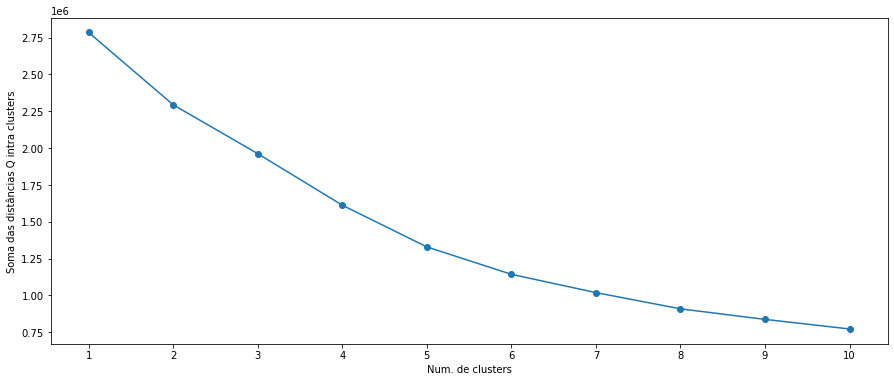

In [48]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(modelo2m)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [45]:
#Criando um modelo
modelo = KMeans(n_clusters=5)
modelo.fit(modelo2m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Adicionando os clusters na tabela de clientes
modelo2['Categoria'] = modelo.predict(modelo2m)
modelo2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,IdVenda,Qtde,IdCliente,Ano,ValorTotal,ItemFat,PaisFat,Categoria
0,536365,6,17850,2016,15.30,0,0,2
1,536365,6,17850,2016,20.34,1,0,2
2,536365,8,17850,2016,22.00,2,0,2
3,536365,6,17850,2016,20.34,3,0,2
4,536365,6,17850,2016,20.34,4,0,2


In [47]:
modelo2.shape

(397846, 8)

In [77]:
dados['Categoria'] = modelo2['Categoria']
dados

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal,ItemFat,PaisFat,Categoria
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30,0,0,2
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,1,0,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00,2,0,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,3,0,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397841,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680,France,2017,12,7,10.20,1842,1,0
397842,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680,France,2017,12,7,12.60,411,1,1
397843,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680,France,2017,12,7,16.60,2925,1,0
397844,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680,France,2017,12,7,16.60,2928,1,0


In [64]:
dados['Categoria'].value_counts()

1    244363
0    112897
2     25779
3     13380
4      1427
Name: Categoria, dtype: int64

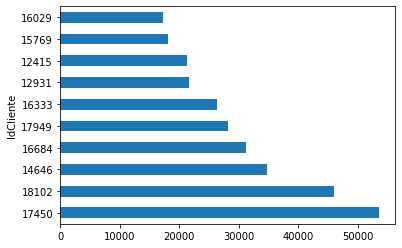

In [71]:
dados[dados['Categoria'] == 4].groupby('IdCliente')['Qtde'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

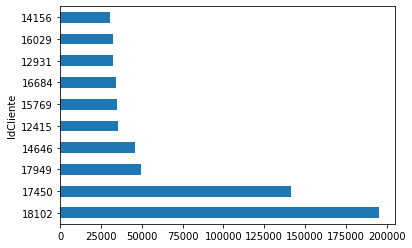

In [73]:
dados[dados['Categoria'] == 4].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

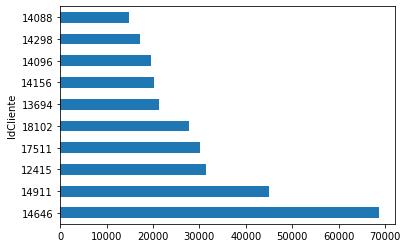

In [80]:
dados[dados['Categoria'] == 0].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

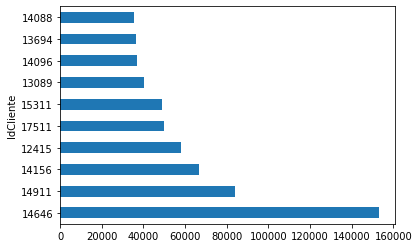

In [81]:
dados[dados['Categoria'] == 1].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

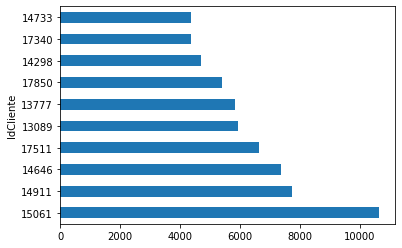

In [82]:
dados[dados['Categoria'] == 2].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

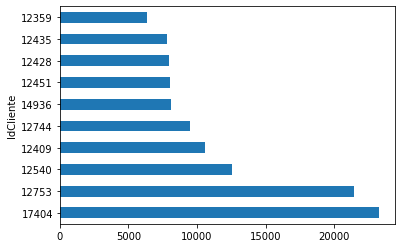

In [83]:
dados[dados['Categoria'] == 3].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Modelo I
Separando clientes por volume de vendas

[ ]
↳ 10 cells hidden
